Chennai House Price Prediction

Problem Statement
Real estate transactions are quite opaque sometimes and it may be
difficult for a newbie to know the fair price of any given home. Thus,
multiple real estate websites have the functionality to predict the prices
of houses given different features regarding it. Such forecasting models
will help buyers to identify a fair price for the home and also give
insights to sellers as to how to build homes that fetch them more
money. Chennai house sale price data is shared here and the
participants are expected to build a sale price prediction model that will
aid the customers to find a fair price for their homes and also help the
sellers understand what factors are fetching more money for the
houses?
Data
The historical sale data is available.


Minimum Requirements
It is not sufficient to just fit a model - the model must be analysed to find
the important factors that contribute towards the price. Also, it will be
better to give a forecast range (range of permissible values) rather than
a single estimate as it will help the customers to negotiate.

Importing necessary modules

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Importing Dataset

In [2]:
df=pd.read_csv("/content/train-chennai-sale.csv")
df.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


Dataset Info

In [3]:
# Number of rows and columns
df.shape

(7109, 22)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7109 non-null   object 
 1   AREA           7109 non-null   object 
 2   INT_SQFT       7109 non-null   int64  
 3   DATE_SALE      7109 non-null   object 
 4   DIST_MAINROAD  7109 non-null   int64  
 5   N_BEDROOM      7108 non-null   float64
 6   N_BATHROOM     7104 non-null   float64
 7   N_ROOM         7109 non-null   int64  
 8   SALE_COND      7109 non-null   object 
 9   PARK_FACIL     7109 non-null   object 
 10  DATE_BUILD     7109 non-null   object 
 11  BUILDTYPE      7109 non-null   object 
 12  UTILITY_AVAIL  7109 non-null   object 
 13  STREET         7109 non-null   object 
 14  MZZONE         7109 non-null   object 
 15  QS_ROOMS       7109 non-null   float64
 16  QS_BATHROOM    7109 non-null   float64
 17  QS_BEDROOM     7109 non-null   float64
 18  QS_OVERA

In [5]:
df.isna().sum() 

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

Cleaning the data

In [6]:
#dropping unwanted columns
df.drop(['PRT_ID','REG_FEE','COMMIS'], axis = 1)

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE
0,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,15-05-1967,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,7600000
1,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,22-12-1995,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,21717770
2,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,09-02-1992,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,13159200
3,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,18-03-1988,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,9630290
4,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,13-10-1979,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,7406250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,Karapakkam,598,03-01-2011,51,1.0,1.0,2,AdjLand,No,15-01-1962,Others,ELO,No Access,RM,3.0,2.2,2.4,2.520,5353000
7105,Velachery,1897,08-04-2004,52,3.0,2.0,5,Family,Yes,11-04-1995,Others,NoSeWa,No Access,RH,3.6,4.5,3.3,3.920,10818480
7106,Velachery,1614,25-08-2006,152,2.0,1.0,4,Normal Sale,No,01-09-1978,House,NoSeWa,Gravel,I,4.3,4.2,2.9,3.840,8351410
7107,Karapakkam,787,03-08-2009,40,1.0,1.0,2,Partial,Yes,11-08-1977,Commercial,ELO,Paved,RL,4.6,3.8,4.1,4.160,8507000


Data Processing

Spelling mistake correction and Grouping the data


replacing the words by correct/actual spelling for the given data 

In [7]:
df["AREA"] = df["AREA"].replace({"Karapakam":"Karapakkam","Ann Nagar":"Anna Nagar","Ana Nagar":"Anna Nagar","Adyr":"Adyar","Velchery":"Velachery",
                                     "Chrompt":"Chrompet","Chrmpet":"Chrompet", "Chormpet":"Chrompet","KKNagar":"KK Nagar","TNagar":"T Nagar"})
df.groupby('AREA')['AREA'].agg('count') 

AREA
Adyar          774
Anna Nagar     788
Chrompet      1702
KK Nagar       997
Karapakkam    1366
T Nagar        501
Velachery      981
Name: AREA, dtype: int64

In [8]:
df['SALE_COND'] = df['SALE_COND'].replace({'Ab Normal' : 'AbNormal','ParatiaLl': 'Partial','Partiall':'Partial','PartiaLl':'Partial','Adj Land':  'AdjLand'})
df.groupby('SALE_COND')['SALE_COND'].agg('count')

SALE_COND
AbNormal       1411
AdjLand        1439
Family         1403
Normal Sale    1423
Partial        1433
Name: SALE_COND, dtype: int64

In [9]:
df.BUILDTYPE = df.BUILDTYPE.replace({"Other":"Others","Comercial":"Commercial"})
df.groupby('BUILDTYPE')['BUILDTYPE'].agg('count')

BUILDTYPE
Commercial    2329
House         2444
Others        2336
Name: BUILDTYPE, dtype: int64

In [10]:
df.UTILITY_AVAIL = df.UTILITY_AVAIL.replace({"All Pub":"AllPub",'NoSewr ':'NoSeWa'})
df.groupby('UTILITY_AVAIL')['UTILITY_AVAIL'].agg('count')

UTILITY_AVAIL
AllPub    1887
ELO       1522
NoSeWa    3700
Name: UTILITY_AVAIL, dtype: int64

In [11]:
df.PARK_FACIL = df.PARK_FACIL.replace({"Noo" : "No"})
df.groupby('PARK_FACIL')['PARK_FACIL'].agg('count')

PARK_FACIL
No     3522
Yes    3587
Name: PARK_FACIL, dtype: int64

In [12]:
df.STREET = df.STREET.replace({"NoAccess" : "No Access",'Pavd':'Paved'})
df.groupby('STREET')['STREET'].agg('count')

STREET
Gravel       2520
No Access    2017
Paved        2572
Name: STREET, dtype: int64

In [13]:
df.groupby('MZZONE')['MZZONE'].agg('count')

MZZONE
A      537
C      550
I      525
RH    1822
RL    1858
RM    1817
Name: MZZONE, dtype: int64

In [14]:
df['DATE_SALE']= pd.to_datetime(df['DATE_SALE'])
df['DATE_BUILD']=pd.to_datetime(df['DATE_BUILD'])
df['YEAR_SOLD']=df['DATE_SALE'].dt.year
df['YEAR_BUILD']=df['DATE_BUILD'].dt.year
df['HOUSE_AGE']=df['YEAR_SOLD']-df['YEAR_BUILD']
df['HOUSE_AGE'].astype("int64")

0       44
1       11
2       20
3       22
4       30
        ..
7104    49
7105     9
7106    28
7107    32
7108    44
Name: HOUSE_AGE, Length: 7109, dtype: int64

DATA VISUALIZATION

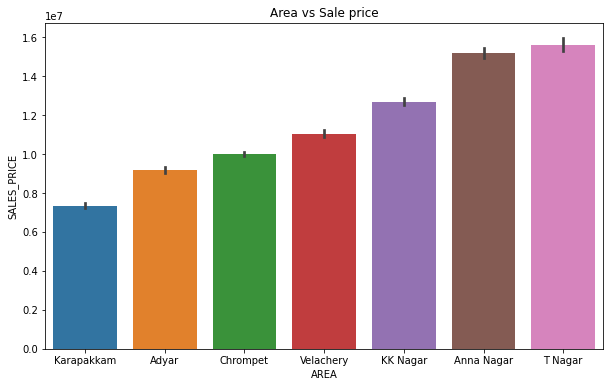

In [15]:
#Area vs sales price
plt.figure(figsize=(10,6))
sns.barplot(x=df['AREA'], y=df["SALES_PRICE"],data=df,order =df.groupby("AREA")['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')["AREA"])
plt.title("Area vs Sale price")
plt.xlabel('AREA')
plt.ylabel('SALES_PRICE')
plt.show()

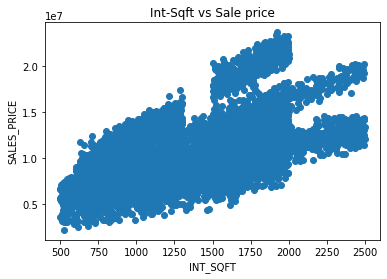

In [16]:
#int_sqft vs Sales price
plt.scatter(df['INT_SQFT'],df['SALES_PRICE'])
plt.title("Int-Sqft vs Sale price")
plt.xlabel('INT_SQFT')
plt.ylabel('SALES_PRICE')
plt.show()

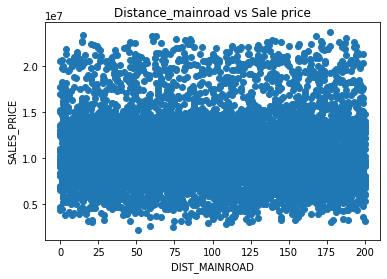

In [17]:
#Distance_mainroad vs Sales price
plt.scatter(df['DIST_MAINROAD'],df['SALES_PRICE'])
plt.title("Distance_mainroad vs Sale price")
plt.xlabel('DIST_MAINROAD')
plt.ylabel('SALES_PRICE')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


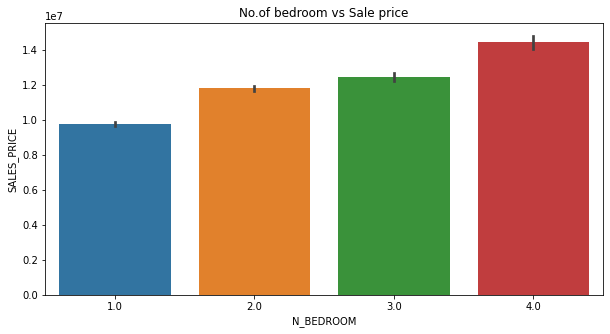

In [18]:
#No.of bedroom vs Sales price
plt.figure(figsize=(10,5))
sns.barplot(df['N_BEDROOM'],df['SALES_PRICE'])
plt.title("No.of bedroom vs Sale price")
plt.xlabel('N_BEDROOM')
plt.ylabel('SALES_PRICE')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


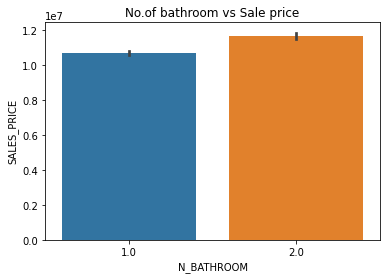

In [19]:
#No.of bathroom vs Sales price
sns.barplot(df['N_BATHROOM'],df['SALES_PRICE'])
plt.title("No.of bathroom vs Sale price")
plt.xlabel('N_BATHROOM')
plt.ylabel('SALES_PRICE')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


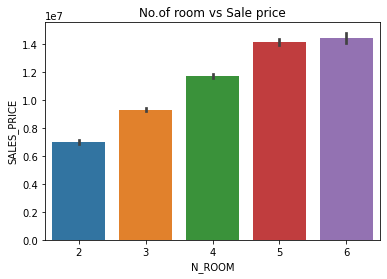

In [20]:
#No. of room vs Sales price
sns.barplot(df['N_ROOM'],df['SALES_PRICE'])
plt.title("No.of room vs Sale price")
plt.xlabel('N_ROOM')
plt.ylabel('SALES_PRICE')
plt.show()

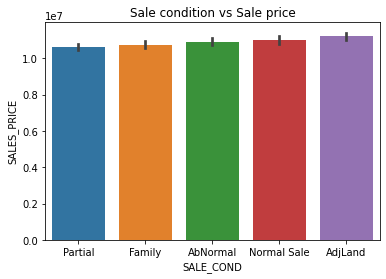

In [21]:
#Sale condition vs Sales price
sns.barplot(x='SALE_COND', y="SALES_PRICE",data=df,order =df.groupby("SALE_COND")['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')["SALE_COND"])
#sns.barplot(df['SALE_COND'],df['SALES_PRICE'])
plt.title("Sale condition vs Sale price")
plt.xlabel('SALE_COND')
plt.ylabel('SALES_PRICE')
plt.show()

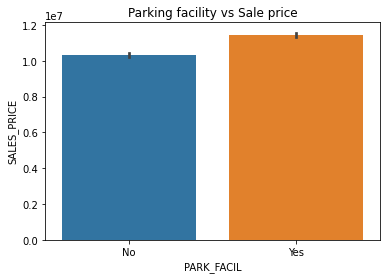

In [22]:
#Parking facility vs Sales price
sns.barplot(x='PARK_FACIL', y="SALES_PRICE",data=df,order =df.groupby("PARK_FACIL")['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')["PARK_FACIL"])
plt.title("Parking facility vs Sale price")
plt.xlabel('PARK_FACIL')
plt.ylabel('SALES_PRICE')
plt.show()

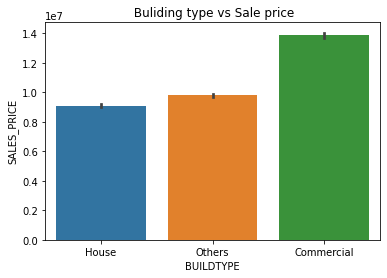

In [23]:
#Building type vs Sales price
sns.barplot(x='BUILDTYPE', y="SALES_PRICE",data=df,order =df.groupby("BUILDTYPE")['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')["BUILDTYPE"])
#sns.barplot(df['BUILDTYPE'],df['SALES_PRICE'])
plt.title(" Buliding type vs Sale price")
plt.xlabel('BUILDTYPE')
plt.ylabel('SALES_PRICE')
plt.show()

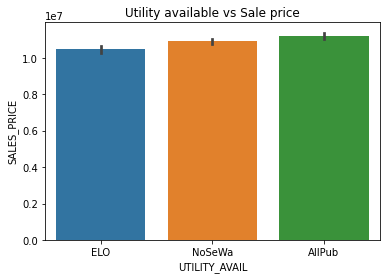

In [24]:
#Utility available vs Sales price
sns.barplot(x='UTILITY_AVAIL', y="SALES_PRICE",data=df,order =df.groupby("UTILITY_AVAIL")['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')["UTILITY_AVAIL"])
plt.title("Utility available vs Sale price")
plt.xlabel('UTILITY_AVAIL')
plt.ylabel('SALES_PRICE')
plt.show()

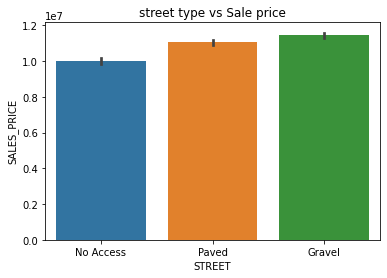

In [25]:
#Street type vs Sales price
sns.barplot(x='STREET', y="SALES_PRICE",data=df,order =df.groupby("STREET")['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')["STREET"])
plt.title("street type vs Sale price")
plt.xlabel('STREET')
plt.ylabel('SALES_PRICE')
plt.show()

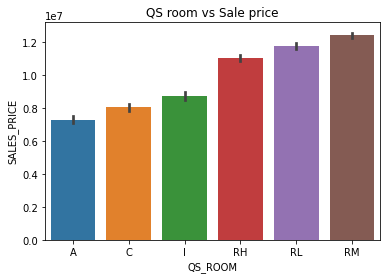

In [26]:
#MZ zone vs Salesprice
sns.barplot(x='MZZONE', y="SALES_PRICE",data=df,order =df.groupby("MZZONE")['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')["MZZONE"])
plt.title("QS room vs Sale price")
plt.xlabel('QS_ROOM')
plt.ylabel('SALES_PRICE')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


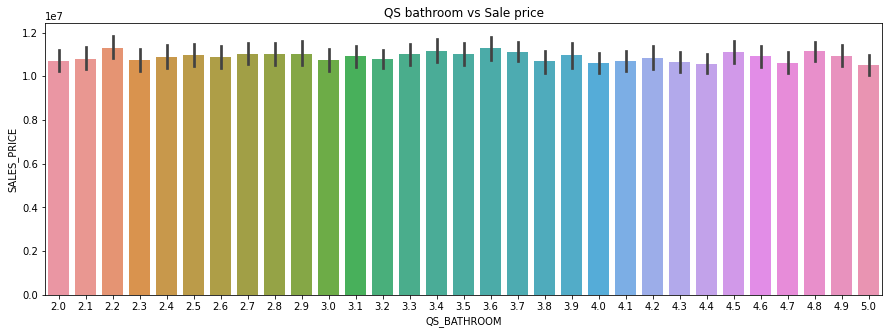

In [27]:
#QS_bathroom vs sales price
plt.figure(figsize=(15,5))
sns.barplot(df['QS_BATHROOM'],df['SALES_PRICE'])
plt.title("QS bathroom vs Sale price")
plt.xlabel('QS_BATHROOM')
plt.ylabel('SALES_PRICE')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


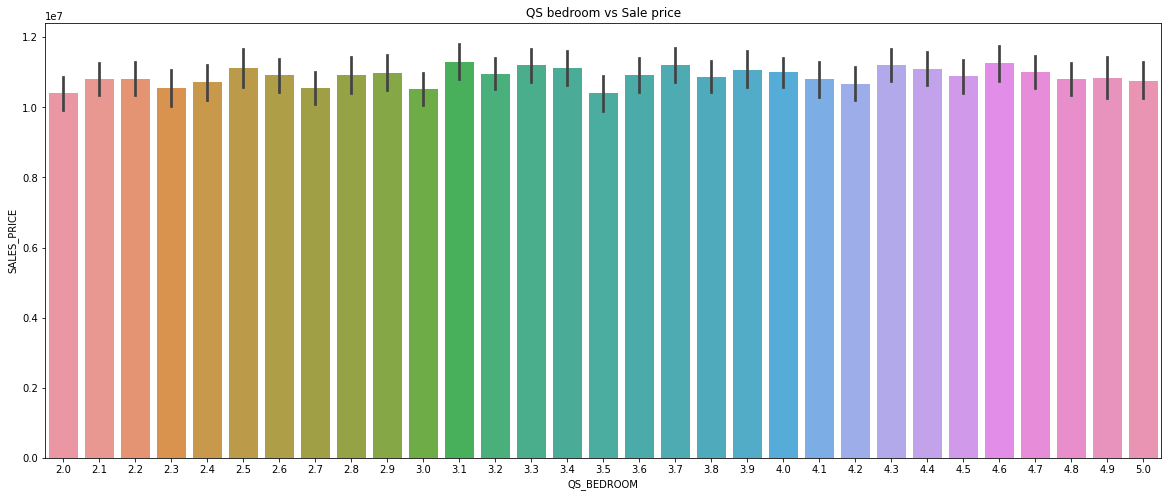

In [28]:
#QS bedroom vs sales price
plt.figure(figsize=(20,8))
sns.barplot(df['QS_BEDROOM'],df['SALES_PRICE'])
plt.title("QS bedroom vs Sale price")
plt.xlabel('QS_BEDROOM')
plt.ylabel('SALES_PRICE')
plt.show()

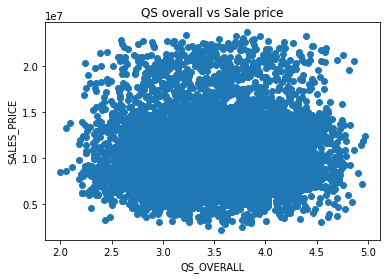

In [29]:
#QS overall vs Sales price
plt.scatter(df['QS_OVERALL'],df['SALES_PRICE'])
plt.title("QS overall vs Sale price")
plt.xlabel('QS_OVERALL')
plt.ylabel('SALES_PRICE')
plt.show()

Encoding the data

In [30]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['AREA'] = le.fit_transform(df.AREA.map({'Karapakkam':0,'Adyar':1,'Chrompet':2,'Velachery':3,'KK Nagar':4,'Anna Nagar':5,'T Nagar':6}))

In [31]:
df['SALE_COND'] = le.fit_transform(df.SALE_COND.map({'Partial':0,'Family':1,'AbNormal':2,'Normal Sale':3,'AdjLand':4}))

In [32]:
df['BUILDTYPE'] = le.fit_transform(df.BUILDTYPE.map({'House':0,'Others':1,'Commercial':2}))

In [33]:
df['UTILITY_AVAIL'] = le.fit_transform(df.UTILITY_AVAIL.map({'ELO' : 0,'AllPub' : 1,'NoSeWa' : 2}))

In [34]:
df['STREET'] = le.fit_transform(df.STREET.map({'NoAccess':0,'Paved':1,'Gravel':2}))

In [35]:
df['MZZONE'] = le.fit_transform(df.MZZONE.map({'A':0,'C':1,'I':2,'RH':3,'RL':4,'RM':5}))

In [36]:
df["PARK_FACIL"]=le.fit_transform(df.PARK_FACIL.map({"Yes":1,"No":2}))

Feature Scaling

In [37]:
df.drop(['PRT_ID','DATE_SALE','REG_FEE','COMMIS','DATE_BUILD','YEAR_BUILD','YEAR_SOLD'],axis=1,inplace=True)
df

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,HOUSE_AGE
0,0,1004,131,1.0,1.0,3,2,0,2,1,0,0,4.0,3.9,4.9,4.330,7600000,44
1,5,1986,26,2.0,1.0,5,2,1,2,1,1,3,4.9,4.2,2.5,3.765,21717770,11
2,1,909,70,1.0,1.0,3,2,0,2,0,1,4,4.1,3.8,2.2,3.090,13159200,20
3,3,1855,14,3.0,2.0,5,1,1,1,2,0,2,4.7,3.9,3.6,4.010,9630290,22
4,0,1226,84,1.0,1.0,3,2,0,1,1,1,1,3.0,2.5,4.1,3.290,7406250,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,0,598,51,1.0,1.0,2,4,1,1,0,2,5,3.0,2.2,2.4,2.520,5353000,49
7105,3,1897,52,3.0,2.0,5,1,0,1,2,2,3,3.6,4.5,3.3,3.920,10818480,9
7106,3,1614,152,2.0,1.0,4,3,1,0,2,1,2,4.3,4.2,2.9,3.840,8351410,28
7107,0,787,40,1.0,1.0,2,0,0,2,0,0,4,4.6,3.8,4.1,4.160,8507000,32


In [38]:
df.head(10)

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,HOUSE_AGE
0,0,1004,131,1.0,1.0,3,2,0,2,1,0,0,4.0,3.9,4.9,4.330,7600000,44
1,5,1986,26,2.0,1.0,5,2,1,2,1,1,3,4.9,4.2,2.5,3.765,21717770,11
2,1,909,70,1.0,1.0,3,2,0,2,0,1,4,4.1,3.8,2.2,3.090,13159200,20
3,3,1855,14,3.0,2.0,5,1,1,1,2,0,2,4.7,3.9,3.6,4.010,9630290,22
4,0,1226,84,1.0,1.0,3,2,0,1,1,1,1,3.0,2.5,4.1,3.290,7406250,30
5,2,1220,36,2.0,1.0,4,0,1,2,2,2,3,4.5,2.6,3.1,3.320,12394750,5
6,2,1167,137,1.0,1.0,3,0,1,1,1,2,4,3.6,2.1,2.5,2.670,8488790,28
7,3,1847,176,3.0,2.0,5,1,1,2,1,1,5,2.4,4.5,2.1,3.260,16800250,10
8,2,771,175,1.0,1.0,2,4,1,1,2,0,5,2.9,3.7,4.0,3.550,8308970,34
9,3,1635,74,2.0,1.0,4,2,1,1,0,2,2,3.1,3.1,3.3,3.160,8083650,15


In [39]:
df.shape

(7109, 18)

In [40]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           7109 non-null   int64  
 1   INT_SQFT       7109 non-null   int64  
 2   DIST_MAINROAD  7109 non-null   int64  
 3   N_BEDROOM      7108 non-null   float64
 4   N_BATHROOM     7104 non-null   float64
 5   N_ROOM         7109 non-null   int64  
 6   SALE_COND      7109 non-null   int64  
 7   PARK_FACIL     7109 non-null   int64  
 8   BUILDTYPE      7109 non-null   int64  
 9   UTILITY_AVAIL  7109 non-null   int64  
 10  STREET         7109 non-null   int64  
 11  MZZONE         7109 non-null   int64  
 12  QS_ROOMS       7109 non-null   float64
 13  QS_BATHROOM    7109 non-null   float64
 14  QS_BEDROOM     7109 non-null   float64
 15  QS_OVERALL     7061 non-null   float64
 16  SALES_PRICE    7109 non-null   int64  
 17  HOUSE_AGE      7109 non-null   int64  
dtypes: float

In [41]:
#checking for nan and infinity values in the data and drop those values
df_new =df.dropna()
df_new[~df_new.isin([np.nan,np.inf,-np.inf]).any(1)]

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,HOUSE_AGE
0,0,1004,131,1.0,1.0,3,2,0,2,1,0,0,4.0,3.9,4.9,4.330,7600000,44
1,5,1986,26,2.0,1.0,5,2,1,2,1,1,3,4.9,4.2,2.5,3.765,21717770,11
2,1,909,70,1.0,1.0,3,2,0,2,0,1,4,4.1,3.8,2.2,3.090,13159200,20
3,3,1855,14,3.0,2.0,5,1,1,1,2,0,2,4.7,3.9,3.6,4.010,9630290,22
4,0,1226,84,1.0,1.0,3,2,0,1,1,1,1,3.0,2.5,4.1,3.290,7406250,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,0,598,51,1.0,1.0,2,4,1,1,0,2,5,3.0,2.2,2.4,2.520,5353000,49
7105,3,1897,52,3.0,2.0,5,1,0,1,2,2,3,3.6,4.5,3.3,3.920,10818480,9
7106,3,1614,152,2.0,1.0,4,3,1,0,2,1,2,4.3,4.2,2.9,3.840,8351410,28
7107,0,787,40,1.0,1.0,2,0,0,2,0,0,4,4.6,3.8,4.1,4.160,8507000,32


In [42]:
df_new.isna().sum()

AREA             0
INT_SQFT         0
DIST_MAINROAD    0
N_BEDROOM        0
N_BATHROOM       0
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
QS_ROOMS         0
QS_BATHROOM      0
QS_BEDROOM       0
QS_OVERALL       0
SALES_PRICE      0
HOUSE_AGE        0
dtype: int64

In [43]:
df_new["N_BEDROOM"]=df_new["N_BEDROOM"].astype("int64")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [44]:
df_new["N_BATHROOM"]=df_new["N_BATHROOM"].astype("int64")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [45]:
df_new["QS_ROOMS"]=df_new["QS_ROOMS"].astype("int64")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [46]:
df_new["QS_BATHROOM"]=df_new["QS_BATHROOM"].astype("int64")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [47]:
df_new["QS_BEDROOM"]=df_new["QS_BEDROOM"].astype("int64")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [48]:
df_new["QS_OVERALL"]=df_new["QS_OVERALL"].astype("int64")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [49]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7056 entries, 0 to 7108
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   AREA           7056 non-null   int64
 1   INT_SQFT       7056 non-null   int64
 2   DIST_MAINROAD  7056 non-null   int64
 3   N_BEDROOM      7056 non-null   int64
 4   N_BATHROOM     7056 non-null   int64
 5   N_ROOM         7056 non-null   int64
 6   SALE_COND      7056 non-null   int64
 7   PARK_FACIL     7056 non-null   int64
 8   BUILDTYPE      7056 non-null   int64
 9   UTILITY_AVAIL  7056 non-null   int64
 10  STREET         7056 non-null   int64
 11  MZZONE         7056 non-null   int64
 12  QS_ROOMS       7056 non-null   int64
 13  QS_BATHROOM    7056 non-null   int64
 14  QS_BEDROOM     7056 non-null   int64
 15  QS_OVERALL     7056 non-null   int64
 16  SALES_PRICE    7056 non-null   int64
 17  HOUSE_AGE      7056 non-null   int64
dtypes: int64(18)
memory usage: 1.0 MB


Seperating the dataset to Train and Test

In [50]:
X =df_new.drop(['SALES_PRICE'],axis=1).copy()
y = df_new['SALES_PRICE'].copy()

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,random_state =1)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(4727, 17)
(4727,)
(2329, 17)
(2329,)


In [52]:
y_test.head()

2646     8213890
5805     7500750
6148     9168900
3857    12072650
2401     9827320
Name: SALES_PRICE, dtype: int64

Feature Scaling

In [53]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [54]:
min_max_scaler = MinMaxScaler()
X_after_min_max_scaler =min_max_scaler.fit_transform(X)
print(X_after_min_max_scaler)

[[0.         0.252      0.655      ... 0.66666667 1.         0.78846154]
 [0.83333333 0.743      0.13       ... 0.         0.5        0.15384615]
 [0.16666667 0.2045     0.35       ... 0.         0.5        0.32692308]
 ...
 [0.5        0.557      0.76       ... 0.         0.5        0.48076923]
 [0.         0.1435     0.2        ... 0.66666667 1.         0.55769231]
 [0.5        0.698      0.78       ... 0.66666667 0.5        0.78846154]]


In [55]:
standardise =StandardScaler()
X_after_standardise =standardise.fit_transform(X)
print(X_after_standardise)

[[-1.37400033 -0.82414448  0.54757748 ...  1.08323535  1.64438362
   1.59978662]
 [ 1.33544753  1.32076394 -1.28169712 ... -1.21170794 -0.0074915
  -1.0764625 ]
 [-0.83211076 -1.0316458  -0.51514395 ... -1.21170794 -0.0074915
  -0.34657638]
 ...
 [ 0.25166839  0.50823244  0.9134324  ... -1.21170794 -0.0074915
   0.30221129]
 [-1.37400033 -1.29812119 -1.03779384 ...  1.08323535  1.64438362
   0.62660512]
 [ 0.25166839  1.12418374  0.98311905 ...  1.08323535 -0.0074915
   1.59978662]]


Linear Rgression

In [56]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [57]:
#Fit the model and predict the test data
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
Y = lr_model.predict(X_test)
print(Y)

[ 9507554.80900479  9064754.40849622  9695149.65916467 ...
 10197413.31887163 14393483.63293871  6229206.70875643]


In [58]:
#Evaluate the model
r2score = r2_score(y_test, Y)
print('R2_score: %.4f' % r2score)

R2_score: 0.8710


In [59]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [60]:
score = model.score(X_train,y_train)
print(score*100,"%")

87.31120482954537 %


Random Forest Regression

In [61]:
from sklearn.ensemble import RandomForestRegressor

In [62]:
#Fit the model and predict the test data
rfr_model = RandomForestRegressor(random_state=1)
rfr_model.fit(X_train, y_train)
print(rfr_model.score(X_train,y_train))
print(rfr_model.score(X_test,y_test))
y_pred = rfr_model.predict(X_test)
y_pred

0.9977884801651364
0.9846852139891799


array([ 8384056.75,  7858090.  ,  9081017.9 , ...,  8983697.  ,
       13016496.  ,  6998697.6 ])

In [63]:
#Evaluate the model
r2score = r2_score(y_test, y_pred)
print('R2_score: %.4f' % r2score)

R2_score: 0.9847


Support Vector Regression

In [64]:
from sklearn.svm import SVR
sv_regressor = SVR(kernel = 'rbf')
sv_regressor.fit(X_train, y_train)
y_pred = sv_regressor.predict(X_test)
print(y_pred)

[10280789.41844316 10281010.05341435 10280822.69859722 ...
 10281382.92711368 10281403.60666    10281395.16995242]


In [65]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred)
print(r2)

-0.028312138924497576


Decision tree regression

In [66]:
from sklearn.tree import DecisionTreeRegressor
dtree_regressor = DecisionTreeRegressor()
dtree_regressor.fit(X_train, y_train)
y_pred = dtree_regressor.predict(X_test)
print(y_pred)

[ 7968450.  7774000.  9400670. ...  9316900. 13427680.  6468090.]


In [67]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred)
print(r2)

0.9647633080388647


XGBoost Regression

In [68]:
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)
y_pred

[03:40:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


array([ 8336365.5,  8145352. ,  9101494. , ...,  9081296. , 12880582. ,
        7053579. ], dtype=float32)

In [69]:
r2 = r2_score(y_test,y_pred)
print(r2)

0.9891861821530483


Cross validation

In [70]:
from sklearn.model_selection import cross_val_score
cross_val_score(rfr_model,X_train,y_train,scoring ='r2')

array([0.98093789, 0.9805823 , 0.98358814, 0.98202507, 0.98342445])

Finding The Important Features

In [71]:
result=pd.DataFrame({'Feature importance':rfr_model.feature_importances_},index= X_train.columns).sort_values(by='Feature importance',ascending = False)
result

,Feature importance
AREA,0.480786
BUILDTYPE,0.330550
INT_SQFT,0.105707
MZZONE,0.039011
PARK_FACIL,0.014332
STREET,0.007978
HOUSE_AGE,0.004983
N_ROOM,0.003156
DIST_MAINROAD,0.002562
N_BATHROOM,0.002410


Therefore the top most important features which helps to pridect the price of the house in Chennai.
The price of the house is depends on 
1.   Area
2.   Build type
3.   Int_Sqft
4.   MZzone
5.   Parking Facilities



